In [52]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

https://www.kaggle.com/niks8411/bike-sharing-prediction

"timestamp" - timestamp field for grouping the data

"cnt" - the count of a new bike shares

"t1" - real temperature in C

"t2" - temperature in C "feels like"

"hum" - humidity in percentage

"windspeed" - wind speed in km/h

"weathercode" - category of the weather

"isholiday" - boolean field - 1 holiday / 0 non holiday

"isweekend" - boolean field - 1 if the day is weekend

"season" - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

"weathe_code" category description:
1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 2 = scattered clouds / few clouds 3 = Broken clouds 4 = Cloudy 7 = Rain/ light Rain shower/ Light rain 10 = rain with thunderstorm 26 = snowfall 94 = Freezing Fog

In [39]:
data = pd.read_csv('london_merged.csv')
data.head(30)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
5,2015-01-04 05:00:00,46,2.0,2.0,93.0,4.0,1.0,0.0,1.0,3.0
6,2015-01-04 06:00:00,51,1.0,-1.0,100.0,7.0,4.0,0.0,1.0,3.0
7,2015-01-04 07:00:00,75,1.0,-1.0,100.0,7.0,4.0,0.0,1.0,3.0
8,2015-01-04 08:00:00,131,1.5,-1.0,96.5,8.0,4.0,0.0,1.0,3.0
9,2015-01-04 09:00:00,301,2.0,-0.5,100.0,9.0,3.0,0.0,1.0,3.0


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [39]:
data.isna().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [40]:
data["timestamp"] = pd.to_datetime(data["timestamp"])
data["month"] = data["timestamp"].apply(lambda x:x.month)
data["day"] = data["timestamp"].apply(lambda x:x.day)
data["hour"] = data["timestamp"].apply(lambda x:x.hour)
data = data.drop("timestamp", axis=1) 

In [41]:
for i in data.columns :
    print(data[i].value_counts(),"\n")

46      46
53      39
120     36
70      36
33      36
        ..
2809     1
2793     1
2697     1
4714     1
2047     1
Name: cnt, Length: 3781, dtype: int64 

 13.000000    969
 12.000000    822
 9.000000     807
 14.000000    802
 11.000000    779
             ... 
 33.500000      3
 31.500000      3
 34.000000      2
 10.333333      1
-1.500000       1
Name: t1, Length: 73, dtype: int64 

 13.000000    969
 12.000000    821
 14.000000    802
 11.000000    774
 16.000000    729
             ... 
 34.000000      2
 10.333333      1
-5.000000       1
-5.500000       1
-6.000000       1
Name: t2, Length: 82, dtype: int64 

88.0    965
82.0    928
77.0    774
87.0    710
76.0    513
       ... 
89.5      1
88.5      1
86.5      1
98.0      1
23.0      1
Name: hum, Length: 143, dtype: int64 

12.000000    842
11.000000    832
14.000000    832
15.000000    828
13.000000    828
            ... 
30.750000      1
56.500000      1
2.666667       1
56.000000      1
35.500000      1
Name: wind_

C:\Users\lidya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hour', ylabel='cnt'>

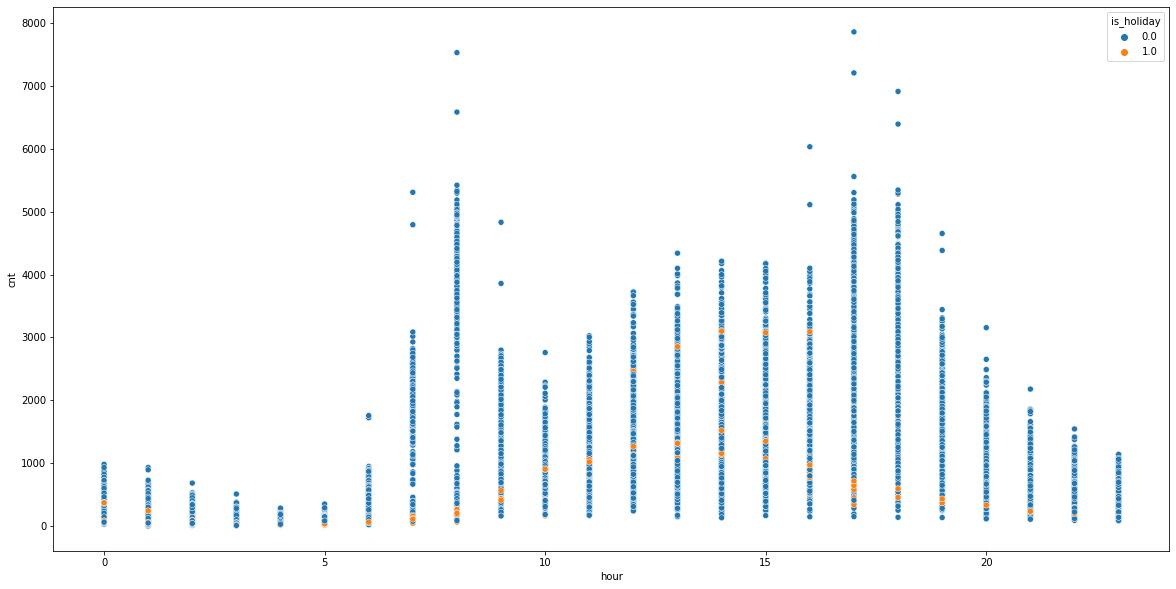

In [42]:
plt.figure(figsize=(20,10))
sns.scatterplot(data['hour'],data['cnt'],hue=data['is_holiday'])


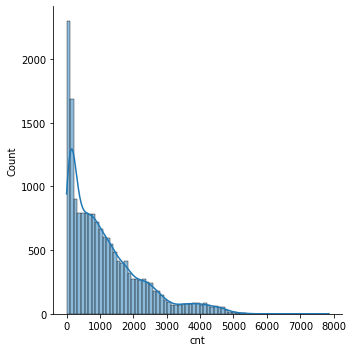

In [43]:
sns.displot(x = 'cnt', data = data,kde = True)

C:\Users\lidya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


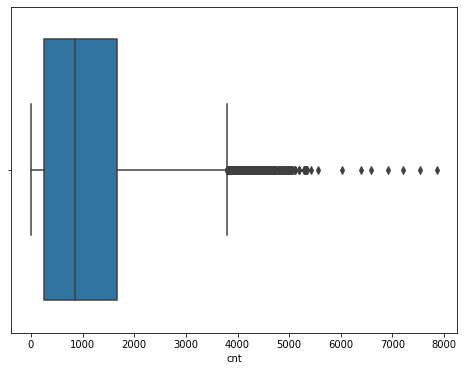

In [44]:
plt.figure(figsize = (8,6))
sns.boxplot(data['cnt']);

In [41]:
X = data.drop(columns = 'cnt')
Y = data['cnt']

In [42]:
from sklearn.preprocessing import RobustScaler
scaler= RobustScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X), index=X.index, columns=X.columns)

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    Y,
    train_size=0.8,
    random_state=10
)

In [46]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV


## LINEAR REGRESSION

In [49]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
lr.score(X_test,y_test)

0.30842388230863826

## SVR

In [50]:
svr = SVR(kernel='rbf',gamma='auto')
svr.fit(X_train, y_train)
pred = svr.predict(X_test)
svr.score(X_test,y_test)

0.16280837038439278

## DECISION TREE REGRESSOR

In [47]:
dt = DecisionTreeRegressor(max_depth = 5 )
dt.fit(X_train, y_train)
pred = dt.predict(X_test)
dt.score(X_test,y_test)

0.6539514652380383

In [48]:
depth = range(1,25)
testing_accuracies_tree = []
training_accuracies_tree = []
score = 0

for i in depth :
    tree = DecisionTreeClassifier(
        criterion='gini',
        max_depth=i)
    tree.fit(X_train,y_train)

    y_predict_train_tree = tree.predict(X_train)
    training_accuracies_tree.append(accuracy_score(y_train, y_predict_train_tree))

    y_predict_test_tree = tree.predict(X_test)
    acc_score_tree = accuracy_score(y_test, y_predict_test_tree)
    testing_accuracies_tree.append(acc_score_tree)

    if score < acc_score_tree :
        score = acc_score_tree
        best_depth = i

In [49]:
print('Best Depth : ', best_depth)
print('Accuracy : ',round(score*100,2))

Best Depth :  16
Accuracy :  0.55


C:\Users\lidya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\lidya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\lidya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:

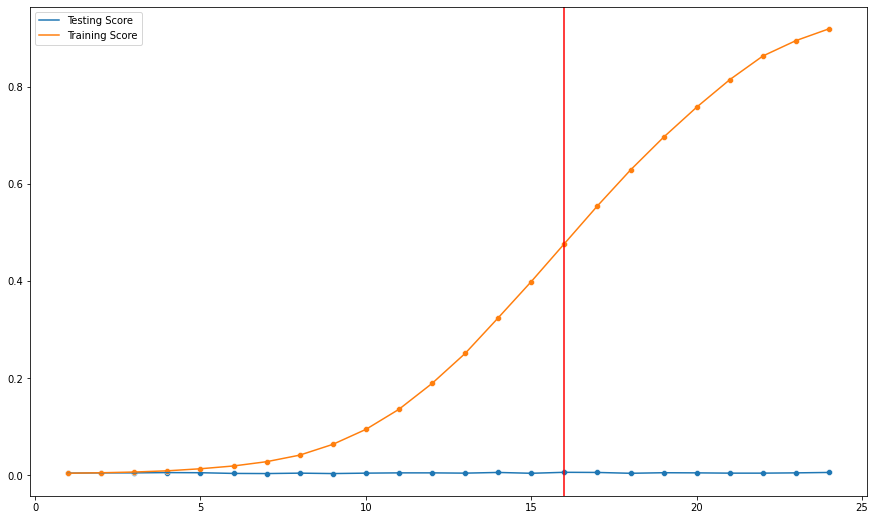

In [50]:
plt.figure(figsize=(15,9))
sns.lineplot(depth, testing_accuracies_tree)
sns.scatterplot(depth, testing_accuracies_tree)
sns.lineplot(depth, training_accuracies_tree)
sns.scatterplot(depth, training_accuracies_tree)
plt.axvline(best_depth, c='red')
plt.legend(['Testing Score', 'Training Score'],fontsize= 10)
plt.show()

In [23]:
## RIDGE

In [52]:
rdg = Ridge()
rdg.fit(X_train, y_train)
pred = rdg.predict(X_test)
rdg.score(X_test,y_test)

0.3084170388692101

## CHOOSE BEST MODEL

In [53]:
model_params = {
    'svm' : {
        'model' : SVR(gamma = 'auto'),
        'params' : {
            'C' : [1,10,20],
            'kernel' : ['rbf','linear']
        }
    },
    'linear_regression': {
        'model' : LinearRegression(),
        'params' : {
        }
    },
    'Decision_Tree' : {
        'model' : DecisionTreeRegressor(),
        'params' : {
            'max_depth' : [3,5,9]
        }
    }

}

In [54]:
scores = []
for model_name, mp in model_params.items() : 
    clf = GridSearchCV(mp['model'],mp['params'], cv = 5, 
    return_train_score = False)
    clf.fit(X_train,y_train)
    scores.append({
        'model' : model_name,
        'best_score' : clf.best_score_,
        'best_params' : clf.best_params_
    })

df = pd.DataFrame(scores,columns = ['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.291395,"{'C': 20, 'kernel': 'rbf'}"
1,linear_regression,0.302231,{}
2,Decision_Tree,0.913870,{'max_depth': 9}


# KALO KLASIFIKASI : 

In [24]:
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

In [6]:
data2 = data

In [7]:
data2['cnt'].describe()

count    17414.000000
mean      1143.101642
std       1085.108068
min          0.000000
25%        257.000000
50%        844.000000
75%       1671.750000
max       7860.000000
Name: cnt, dtype: float64

In [8]:
data2['cnt'] = np.where(data2['cnt']<=1000,0,(np.where(data2['cnt']<=2000,1,(np.where(data2['cnt']<=3000,2,(np.where(data2['cnt']<=3000,2,(np.where(data2['cnt']<=4000,3,(np.where(data2['cnt']<=5000,4,(np.where(data2['cnt']<=6000,5,(np.where(data2['cnt']<=7000,6,7)))))))))))))))
data2['cnt'].value_counts()

0    9743
1    4414
2    2006
3     737
4     479
5      28
6       4
7       3
Name: cnt, dtype: int64

In [11]:
X2 = data2.drop(columns = 'cnt')
Y2 = data2['cnt']

In [16]:
from sklearn.preprocessing import RobustScaler
scaler= RobustScaler()
scaler.fit(X2)
X2 = pd.DataFrame(scaler.transform(X2), index=X2.index, columns=X2.columns)

In [17]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2,
    Y2,
    train_size=0.8,
    random_state=10
)

# DECISION TREE

In [18]:
from sklearn.metrics import accuracy_score

depth = range(1,25)
testing_accuracies_tree = []
training_accuracies_tree = []
score = 0

for i in depth :
    tree = DecisionTreeClassifier(
        criterion='gini',
        max_depth=i)
    tree.fit(X2_train,y2_train)

    y_predict_train_tree = tree.predict(X2_train)
    training_accuracies_tree.append(accuracy_score(y2_train, y_predict_train_tree))

    y_predict_test_tree = tree.predict(X2_test)
    acc_score_tree = accuracy_score(y2_test, y_predict_test_tree)
    testing_accuracies_tree.append(acc_score_tree)

    if score < acc_score_tree :
        score = acc_score_tree
        best_depth = i

In [19]:
print('Best Depth : ', best_depth)
print('Accuracy : ',round(score*100,2))

Best Depth :  11
Accuracy :  85.67


C:\Users\lidya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\lidya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\lidya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:

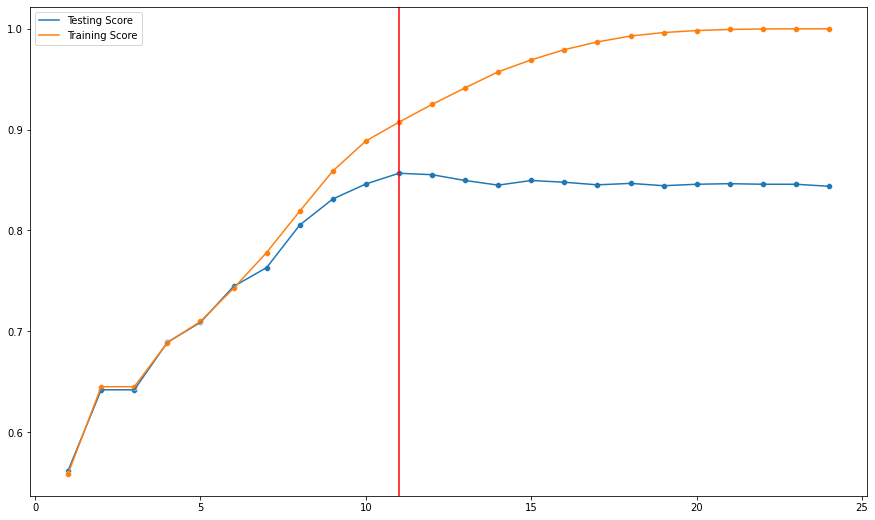

In [20]:
plt.figure(figsize=(15,9))
sns.lineplot(depth, testing_accuracies_tree)
sns.scatterplot(depth, testing_accuracies_tree)
sns.lineplot(depth, training_accuracies_tree)
sns.scatterplot(depth, training_accuracies_tree)
plt.axvline(best_depth, c='red')
plt.legend(['Testing Score', 'Training Score'],fontsize= 10)
plt.show()

## Naive Bayes

In [53]:
from sklearn.naive_bayes import GaussianNB

In [54]:
nb = GaussianNB()
nb.fit(X2_train,y2_train)
nb.score(X2_train,y2_train)

0.3543894910630967